<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1296 non-null   float64
 1   sex       1329 non-null   object 
 2   bmi       1296 non-null   float64
 3   children  1314 non-null   float64
 4   smoker    1305 non-null   object 
 5   region    1054 non-null   object 
 6   charges   1314 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [7]:
num = [i for i in df.columns if df[i].dtype != 'O']
cat = [i for i in df.columns if df[i].dtype == 'O']

In [8]:
num

['age', 'bmi', 'children', 'charges']

In [9]:
for i in df.columns:
    if i in num:
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        df[i].fillna(df[i].mode()[0], inplace=True)


/tmp/ipython-input-1861007213.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)
/tmp/ipython-input-1861007213.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [11]:
df.duplicated().sum()

np.int64(4)

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.240470,30.655246,1.093665,13267.943565
std,13.821573,6.029784,1.196230,12040.693977
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4763.252250
50%,39.225309,30.590000,1.000000,9467.513300
75%,51.000000,34.400000,2.000000,16389.832412
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

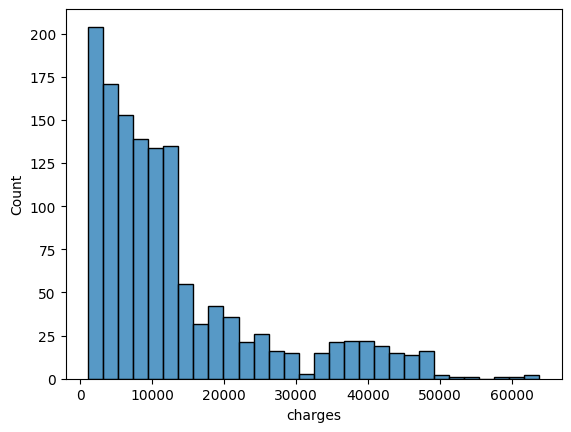

In [14]:
sns.histplot(data=df,x='charges')

In [15]:
# Q1 = df['charges'].quantile(0.25)
# Q3 = df['charges'].quantile(0.75)
# iqr = Q3 - Q1
# lower = Q1 - 1.5 * iqr
# upper = Q3 + 1.5 * iqr

# df = df[(df['charges'] >= lower) & (df['charges'] <= upper)]


In [16]:
df.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.240470,30.655246,1.093665,13267.943565
std,13.821573,6.029784,1.196230,12040.693977
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4763.252250
50%,39.225309,30.590000,1.000000,9467.513300
75%,51.000000,34.400000,2.000000,16389.832412
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
x = df.drop('charges' , axis=1)
y = df['charges']

In [18]:
from sklearn.model_selection import train_test_split

xtrain ,xtest , ytrain , ytest = train_test_split(x , y , random_state=40 , test_size=0.2)

In [19]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [20]:
cat

['sex', 'smoker', 'region']

In [21]:
import category_encoders as ce

enc = ce.OneHotEncoder(cols=['sex', 'region' , 'smoker'])

xtrain = enc.fit_transform(xtrain)
xtest = enc.transform(xtest)

In [22]:
xtrain.head()

,age,sex_1,sex_2,bmi,children,smoker_1,smoker_2,region_1,region_2,region_3,region_4
992,50.0,1,0,31.6,2.0,1,0,1,0,0,0
734,59.0,1,0,32.1,3.0,1,0,0,1,0,0
369,18.0,0,1,30.4,3.0,1,0,0,0,1,0
284,52.0,1,0,31.2,0.0,1,0,1,0,0,0
1303,43.0,0,1,27.8,0.0,0,1,1,0,0,0


In [23]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

sc = RobustScaler()

xtrain = xtrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)

cols_to_scale = ['age', 'bmi']
other_cols_train = xtrain.drop(cols_to_scale, axis=1)
other_cols_test = xtest.drop(cols_to_scale, axis=1)

xtrain_scaled_arr = sc.fit_transform(xtrain[cols_to_scale].values)
xtest_scaled_arr = sc.transform(xtest[cols_to_scale].values)

xtrain_scaled_df = pd.DataFrame(xtrain_scaled_arr, columns=cols_to_scale, index=xtrain.index)
xtest_scaled_df = pd.DataFrame(xtest_scaled_arr, columns=cols_to_scale, index=xtest.index)

xtrain = pd.concat([other_cols_train, xtrain_scaled_df], axis=1)
xtest = pd.concat([other_cols_test, xtest_scaled_df], axis=1)

In [24]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(xtrain , ytrain)
ypred = ln.predict(xtest)

In [25]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMSE' : np.sqrt(mean_squared_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE         RMSE
0  0.712944  4345.039364  4.053182e+07  6366.460297


<Axes: ylabel='charges'>

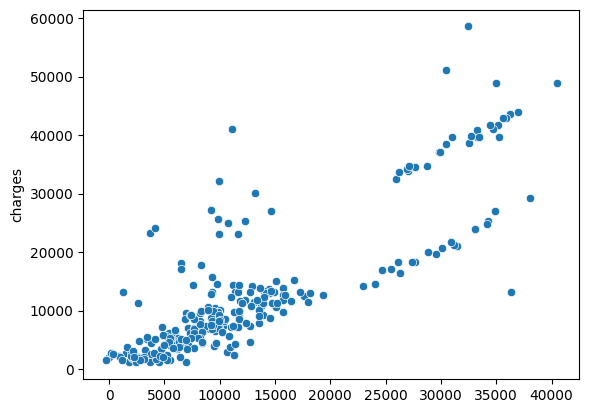

In [26]:
sns.scatterplot(x = ypred , y = ytest)

<Axes: ylabel='charges'>

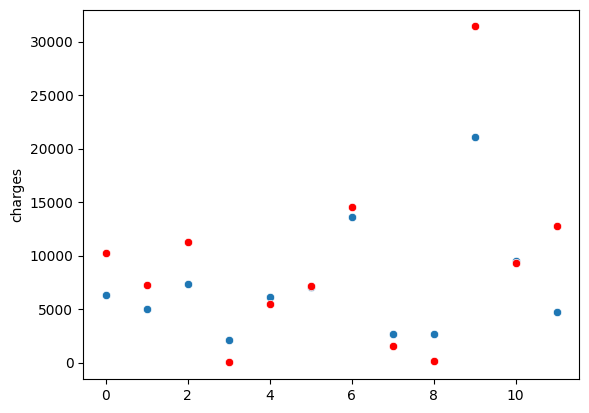

In [27]:
sns.scatterplot(x = [0,1,2,3,4,5,6,7,8,9,10,11] , y = ytest[:12])
sns.scatterplot(x = [0,1,2,3,4,5,6,7,8,9,10,11] , y = ypred[:12],color='red')

In [28]:
from sklearn.tree import DecisionTreeRegressor
ln = DecisionTreeRegressor()
ln.fit(xtrain , ytrain)
ypred = ln.predict(xtest)

In [29]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMSE' : np.sqrt(mean_squared_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2         MAE           MSE         RMSE
0  0.666003  3411.58306  4.715980e+07  6867.299099


In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(xtrain, ytrain)

ypred = knn_reg.predict(xtest)

In [32]:
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMSE' : np.sqrt(mean_squared_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE         RMSE
0  0.709046  4243.317196  4.108227e+07  6409.544925


In [33]:
k = 30
error = []
accuracy = []

for i in range(1, k+1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain , ytrain)
  ypred = knn.predict(xtest)
  error.append(1-r2_score(ytest , ypred))
  accuracy.append(r2_score(ytest , ypred))

Text(0.5, 1.0, 'Accuracy vs K')

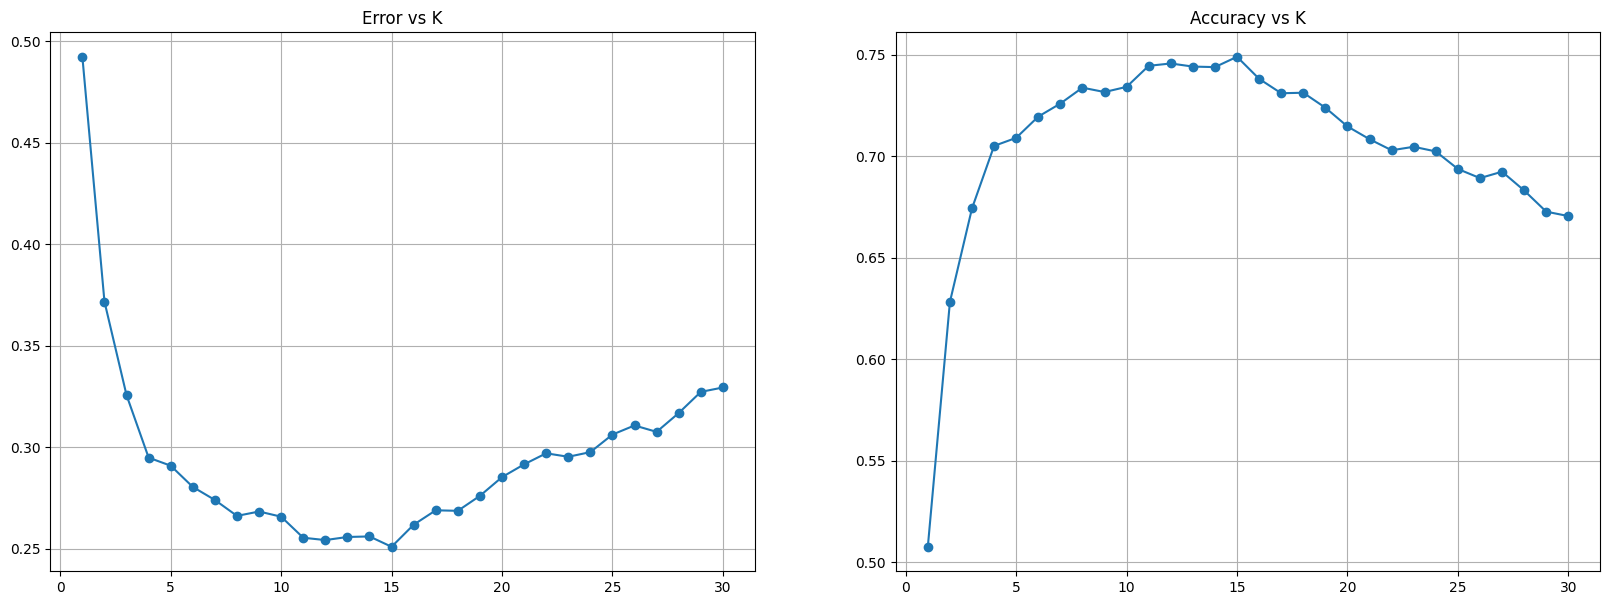

In [34]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,31) , error , marker='o')
plt.grid()
plt.title('Error vs K')

plt.subplot(1,2,2)
plt.plot(range(1,31) , accuracy , marker='o')
plt.grid()
plt.title('Accuracy vs K')

In [36]:
knn_reg = KNeighborsRegressor(n_neighbors=15)

knn_reg.fit(xtrain, ytrain)

ypred = knn_reg.predict(xtest)

dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMSE' : np.sqrt(mean_squared_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

        R2          MAE           MSE         RMSE
0  0.74899  3941.154704  3.544225e+07  5953.339149
